# LMAPR2001 - Block 2 : Second section

## Reflectivity and transmittivity of a slab

For a single slab of FeS2, in air (air => FeS2 => air)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#range de fréquences angulaires [rad/s]
omegaG = 1.338e15
#nombre de samples in omega
n = 1000
omega = np.logspace(12,np.log10(omegaG),n)

#ambient air
nAir = 1
kappaAir = 0
N0 = 1 + 1j*0

def resulting(x) : 
    """
    @pre : x is an array of complex or real float values
    @post : returns the number resulting to the components of the array
    """
    return np.sqrt(sum(x**2))

#following values are obtained from the Excel file provided on moodle
epsilonInfinity1 = 19.17402283496171
epsilonInfinity2 = 22.09805938253293
epsilonInfinity3 = 20.60710234103419
epsilonInfinity = resulting(np.array([epsilonInfinity1,epsilonInfinity2,epsilonInfinity3]))
f11 = 4.213279900760202 
f12 = 1.961693284797713
f13 = 0.007966945581503451
f1 = resulting(np.array([f11,f12,f13]))
omegaTO11 = 79231717132503.97
omegaTO12 = 57563096713280.8
omegaTO13 = 49033016471727.84
omegaTO1 = resulting(np.array([omegaTO11,omegaTO12,omegaTO13]))
gamma11 = 151929351721.5274
gamma12 = 151947673655.9077
gamma13 = 156461516099.8209
gamma1 = resulting(np.array([gamma11,gamma12,gamma13]))
f22 = 2.318085089104123
f23 = 1.935048918661783
f2 = resulting(np.array([f22,f23]))
omegaTO22 = 70373122741473.44
omegaTO23 = 62330594312793.54
omegaTO2 = resulting(np.array([omegaTO22,omegaTO23]))
gamma22 = 151959123549.7535
gamma23 = 151954274514.8117
gamma2 = resulting(np.array([gamma22,gamma23]))
f32 = 3.803690401550578
f33 = 6.832435225656633
f3 = resulting(np.array([f32,f33]))
omegaTO32 = 73806724238431.17
omegaTO33 = 77733154461442.81
omegaTO3 = resulting(np.array([omegaTO32,omegaTO33]))
gamma32 = 151930325428.5151
gamma33 = 151936692746.3015
gamma3 = resulting(np.array([gamma32,gamma33]))
f = np.array([f1,f2,f3])
omegaTO = np.array([omegaTO1,omegaTO2,omegaTO3])
gamma = np.array([gamma1,gamma2,gamma3])

In [3]:
def epsilonIso(omega) : 
    somme = np.zeros(len(omega),dtype='cdouble')
    for i in range(3) : 
        somme += f[i]*omegaTO[i]**2/(omegaTO[i]**2-omega**2-(omega*gamma[i])*1j)
    return epsilonInfinity + somme

In [4]:
def realN(omega) : 
    epsilon = epsilonIso(omega)
    epsilonIsoReal = np.array([x.real for x in epsilon])
    epsilonIsoImg = np.array([x.imag for x in epsilon])
    return 1/(2**(1/2))*(epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)

In [5]:
def kappa(omega) : 
    epsilon = epsilonIso(omega)
    epsilonIsoReal = np.array([x.real for x in epsilon])
    epsilonIsoImg = np.array([x.imag for x in epsilon])
    return 1/(2**(1/2))*(-epsilonIsoReal + (epsilonIsoReal**2+epsilonIsoImg**2)**(1/2))**(1/2)

In [6]:
def complexNmod(omega) : 
    n = realN(omega)
    kappa = kappa(omega)
    return (n**2 + kappa**2)**1/2

In [7]:
def complexN(omega) : 
    n = realN(omega)
    kappaVal = kappa(omega)
    res = np.zeros(len(omega),dtype='cdouble')
    for i in range(len(res)) : 
        res[i] = n[i]-1j*kappaVal[i]
    return res

## Additional values

### Sine and cosine of incident angle

$\sin(\varphi_0) = \sin\left(\dfrac{\varphi_0\cdot\pi}{180}\right)$

$\cos(\phi_0) = \sqrt{1-\sin(\varphi_0)^2}$

### Computation of the angle in the FeS2 slab (complex Snell's law)
$N_0\sin(\varphi_0) = N_1\sin(\varphi_1)$

$\sin(\varphi_1) = \dfrac{N_0\sin(\varphi_0)}{N_1}$

### Computation of the angle in the air (after transmission into the FeS2 slab)

$N_1\sin(\varphi_1) = N_2\sin(\varphi_2)$

$\sin(\varphi_2) = \dfrac{N_1\sin(\varphi_1)}{N_2}$

### Fresnel reflection and transmission coefficients at the 0-1 interface 

$r_{01p} = \dfrac{N_1\cos(\varphi_0)-N_0\cos(\varphi_1)}{N_1\cos(\varphi_0)+N_0\cos(\varphi_1)}$

$r_{01s} = \dfrac{N_0\cos(\varphi_0)-N_1\cos(\varphi_1)}{N_0\cos(\varphi_0)+N_1\cos(\varphi_1)}$

$t_{01p} = \dfrac{2N_0\cos(\varphi_0)}{N_1\cos(\varphi_0)+N_0\cos(\varphi_1)}$

$t_{01s} = \dfrac{2N_0\cos(\varphi_0)}{N_0\cos(\varphi_0)+N_1\cos(\varphi_1)}$

### Fresnel reflection and transmission coefficients at the 1-2 interface 

$r_{12p} = \dfrac{N_2\cos(\varphi_1)-N_1\cos(\varphi_2)}{N_2\cos(\varphi_1)+N_1\cos(\varphi_2)}$

$r_{12s} = \dfrac{N_1\cos(\varphi_1)-N_2\cos(\varphi_2)}{N_1\cos(\varphi_1)+N_2\cos(\varphi_2)}$

$t_{12p} = \dfrac{2N_1\cos(\varphi_1)}{N_2\cos(\varphi_1)+N_1\cos(\varphi_2)}$

$t_{12s} = \dfrac{2N_1\cos(\varphi_1)}{N_1\cos(\varphi_1)+N_2\cos(\varphi_2)}$

### Phase angle (film phase thickness)

$\beta = 2\pi\left(\dfrac{d_1}{\lambda}N_1\cos(\varphi_1)\right)$

where the wavelength in the vacuum $\text{[}10^{-6}\text{m]}$ is obtained as follows : $\lambda = \dfrac{2\pi c}{\omega}$, with $c$ the speed of light in vacuum.

### Polarized complex-amplitude reflection and transmission coefficients

$R_p = \dfrac{r_{01p}+r_{12p}\exp(-j2\beta)}{1+r_{01p}r_{12p}\exp(-j2\beta)}$

$R_s = \dfrac{r_{01s}+r_{12s}\exp(-j2\beta)}{1+r_{01s}r_{12s}\exp(-j2\beta)}$

$T_p = \dfrac{t_{01p}t_{12p}\exp(-j\beta)}{1+r_{01p}r_{12p}\exp(-j2\beta)}$

$T_s = \dfrac{t_{01s}t_{12s}\exp(-j\beta)}{1+r_{01s}r_{12s}\exp(-j2\beta)}$

### Results

Reflection : $R = \dfrac{1}{2}\left(R_p^2+R_s^2\right)$

Transmission : $T = \dfrac{1}{2}\left(T_p^2+T_s^2\right)$

Absorption : $A = 1-R-T$

In [8]:
def computeR(d,omega,phi0) :
    #ambient air
    nAir = 1
    kappaAir = 0
    N0 = 1 + 1j*0
    wavelength = 2*np.pi*3e14/omega
    N1 = complexN(omega)
    #sin et cos de l'angle d'incidence (air=>FeS2)
    sinphi0 = np.sin(phi0/180*np.pi)
    cosphi0 = np.sqrt(1-sinphi0**2)
    sinphi1 = N0*sinphi0/N1
    cosphi1 = np.sqrt(1-sinphi1**2)
    sinphi2 = N1*sinphi1/N0
    cosphi2 = np.sqrt(1-sinphi2**2)
    beta1 = 2*np.pi*d*N1*cosphi1/wavelength
    r01p = (N1*cosphi0-N0*cosphi1)/(N1*cosphi0+N0*cosphi1)
    r01s = (N0*cosphi0-N1*cosphi1)/(N0*cosphi0+N1*cosphi1)
    r12p = (N0*cosphi1-N1*cosphi2)/(N0*cosphi1+N1*cosphi2)
    r12s = (N1*cosphi1-N0*cosphi2)/(N1*cosphi1+N0*cosphi2)
    Rp = (r01p+r12p*np.exp(1j*(-2*beta1)))/(1+r01p*r12p*np.exp(1j*(-2*beta1)))
    Rs = (r01s+r12s*np.exp(1j*(-2*beta1)))/(1+r01s*r12s*np.exp(1j*(-2*beta1)))
    R = 0.5*(abs(Rp)**2+abs(Rs)**2)
    return R

def computeT(d,omega,phi0) :
    #ambient air
    nAir = 1
    kappaAir = 0
    N0 = 1 + 1j*0
    wavelength = 2*np.pi*3e14/omega
    N1 = complexN(omega)
    #sin et cos de l'angle d'incidence (air=>FeS2)
    sinphi0 = np.sin(phi0/180*np.pi)
    cosphi0 = np.sqrt(1-sinphi0**2)
    sinphi1 = N0*sinphi0/N1
    cosphi1 = np.sqrt(1-sinphi1**2)
    sinphi2 = N1*sinphi1/N0
    cosphi2 = np.sqrt(1-sinphi2**2)
    beta2 = 2*np.pi*d*N1*cosphi1/wavelength
    t01p = (2*N0*cosphi0)/(N1*cosphi0+N0*cosphi1)
    t01s = (2*N0*cosphi0)/(N0*cosphi0+N1*cosphi1)
    t12p = (2*N1*cosphi1)/(N0*cosphi1+N1*cosphi2)
    t12s = (2*N1*cosphi1)/(N1*cosphi1+N0*cosphi2)
    r01p = (N1*cosphi0-N0*cosphi1)/(N1*cosphi0+N0*cosphi1)
    r01s = (N0*cosphi0-N1*cosphi1)/(N0*cosphi0+N1*cosphi1)
    r12p = (N0*cosphi1-N1*cosphi2)/(N0*cosphi1+N1*cosphi2)
    r12s = (N1*cosphi1-N0*cosphi2)/(N1*cosphi1+N0*cosphi2)
    Tp = (t01p*t12p*np.exp(1j*(-1*beta2)))/(1+r01p*r12p*np.exp(1j*(-2*beta2)))
    Ts = (t01s*t12s*np.exp(1j*(-1*beta2)))/(1+r01s*r12s*np.exp(1j*(-2*beta2)))
    T = 0.5*(abs(Tp)**2+abs(Ts)**2)
    return T

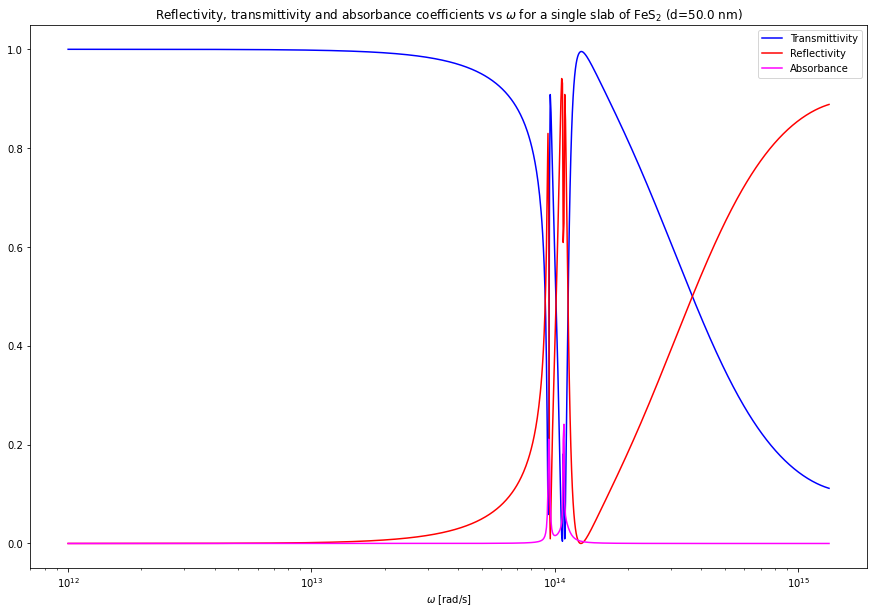

In [9]:
#angle d'incidence [°]
phi0 = 0

#film thickness [µm]
d = 0.05

R = computeR(d,omega,phi0)
T = computeT(d,omega,phi0)
A = 1-R-T

plt.figure(figsize=(15,10))
plt.plot(omega,T,color='blue',label="Transmittivity")
plt.plot(omega,R,color='red',label="Reflectivity")
plt.plot(omega,A,color='magenta',label = "Absorbance")
plt.title(r'Reflectivity, transmittivity and absorbance coefficients vs $\omega$ for a single slab of FeS$_2$ (d={} nm)'.format(d*1000))
plt.xlabel(r'$\omega$ [rad/s]')
plt.xscale('log')
plt.legend()
plt.show()

## Reflectivity of bulk material

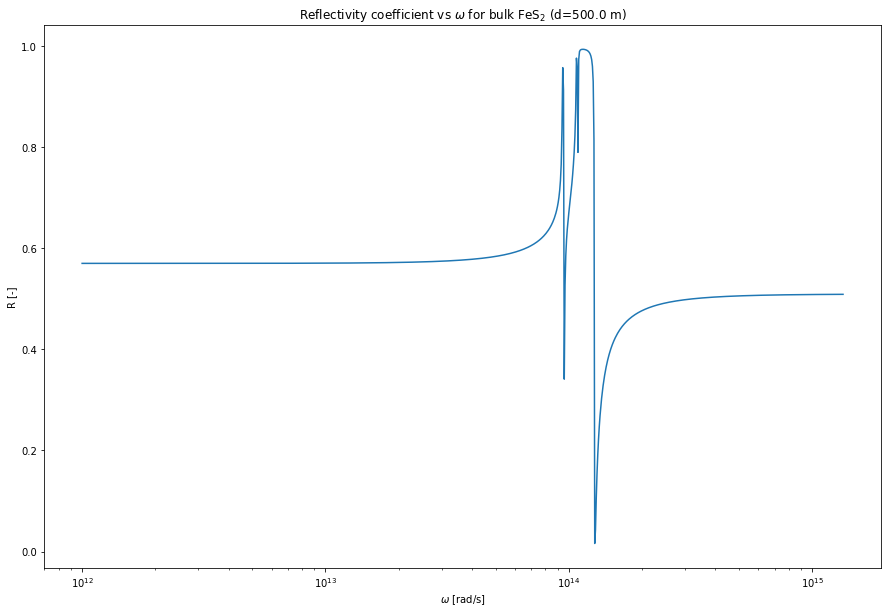

Highest peak : 0.993330400235892 at 113798831928346.22 [rad/s]


In [10]:
#angle d'incidence [°]
phi0 = 0

#film thickness [µm]
d = 0.05e10

R = computeR(d,omega,phi0)

plt.figure(figsize=(15,10))
plt.plot(omega,R)
plt.title(r'Reflectivity coefficient vs $\omega$ for bulk FeS$_2$ (d={} m)'.format(d/1e6))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('R [-]')
plt.xscale('log')
plt.show()
print("Highest peak : {0} at {1} [rad/s]".format(max(R),omega[np.argmax(R)]))

We can see sharp peaks around $10^{14}$ [rad/s] (more precisely, the highest peak is situated on $1,063\times 10^{14}$ [rad/s]. As the frequency gets closer to the band gap frequency, the refectivity reaches a constant value at about 0.5, due to the high thickness of the material.

## Select a reasonable thickness 

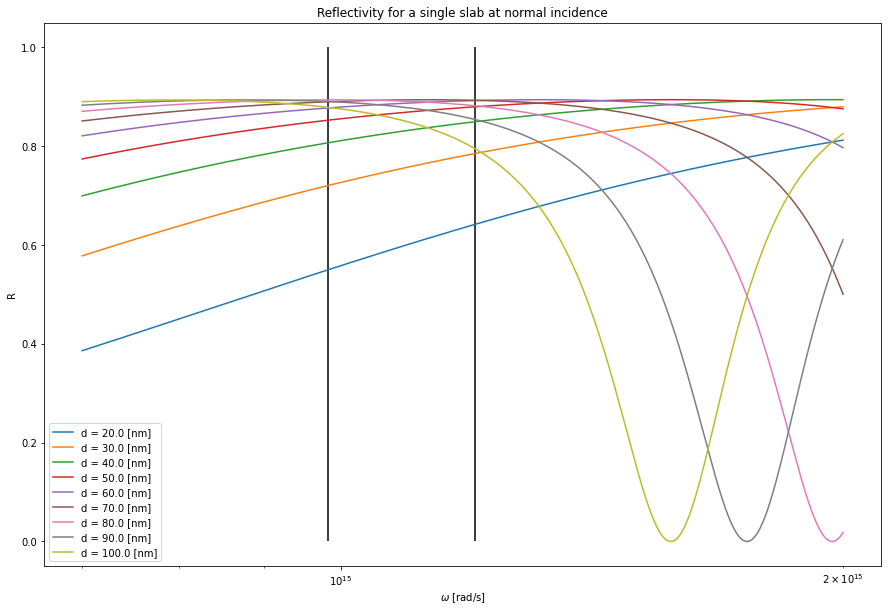

In [11]:
#range of different thicknesses
omega = np.logspace(np.log10(7e14),np.log10(2e15),n)
thicknesses = np.array([2,3,4,5,6,7,8,9,10])/100
plt.figure(figsize=(15,10))
for i in range(9) : 
    plt.plot(omega,computeR(thicknesses[i],omega,0),label='d = {0} [nm]'.format(thicknesses[i]*1000))
plt.xscale('log')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('R')
plt.legend()
plt.title('Reflectivity for a single slab at normal incidence')
#the range of LASER frequencies
plt.vlines(9.832e14,0,1)
# = 90% of the bandgap
plt.vlines(0.9*omegaG,0,1)
plt.show()

We can see that 70 nm is a good thickness as the corresponding (brown) line is the highest in the range of operating frequencies, calculated between the highest operating frequency ($90\%$ of $\omega_g$) and the corresponding redshift. 

Then, we plot on the same graph the reflectivity for a slab of 70 nm and the reflectivity of the bulk material : 

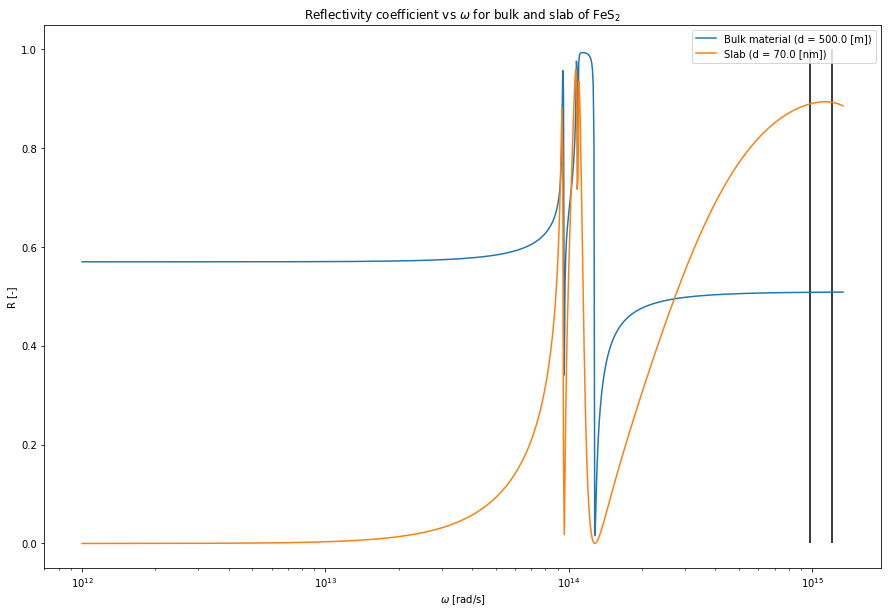

In [12]:
omega = np.logspace(12,np.log10(omegaG),n)

#angle d'incidence [°]
phi0 = 0

#film thickness [µm]
d1 = 0.05e10
d2 = 0.07

R1 = computeR(d1,omega,phi0)
R2 = computeR(d2,omega,phi0)

plt.figure(figsize=(15,10))
plt.plot(omega,R1,label='Bulk material (d = {} [m])'.format(d1/1e6))
plt.plot(omega,R2,label='Slab (d = {} [nm])'.format(d2*1000))
plt.title(r'Reflectivity coefficient vs $\omega$ for bulk and slab of FeS$_2$')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('R [-]')
plt.legend()
plt.xscale('log')
#the range of LASER frequencies
plt.vlines(9.832e14,0,1)
# = 90% of the bandgap
plt.vlines(omegaG*0.9,0,1)
plt.show()

At the frequencies range of interest, we can see that the reflectivity is much higher for the slab. This is due to the interferences in the slab due to the multiple reflections on the surfaces of the sail.

This is not possible in a bulk material (assumed to be infinitely thick).

## Transmittivity of bulk material

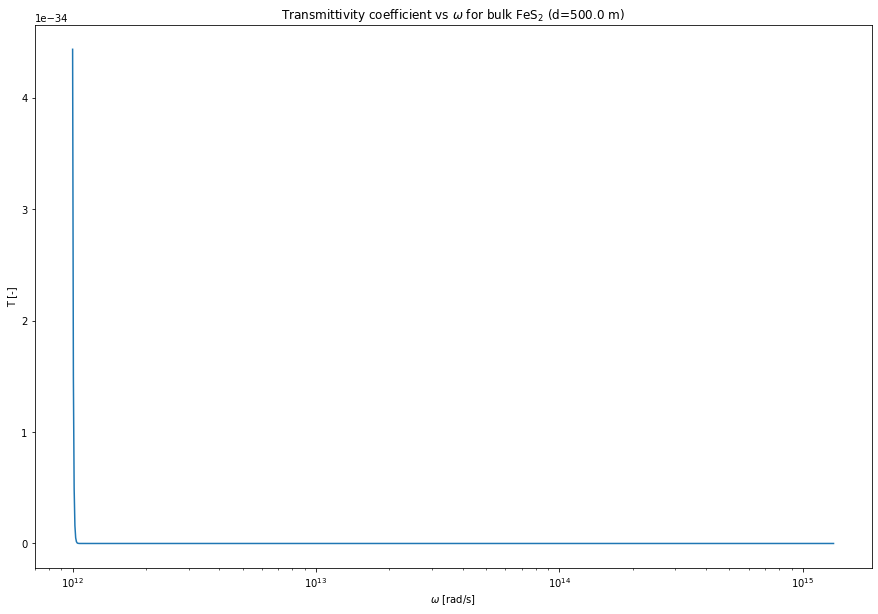

Highest peak : 0.993330400235892 at 113798831928346.22 [rad/s]


In [13]:
#angle d'incidence [°]
phi0 = 0

#film thickness [µm]
d = 0.05e10

T = computeT(d,omega,phi0)

plt.figure(figsize=(15,10))
plt.plot(omega,T)
plt.title(r'Transmittivity coefficient vs $\omega$ for bulk FeS$_2$ (d={} m)'.format(d/1e6))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('T [-]')
plt.xscale('log')
plt.show()
print("Highest peak : {0} at {1} [rad/s]".format(max(R),omega[np.argmax(R)]))

We see that the transmittivity is really low, about 0 for frequencies higher than $10^{12}$ [rad/s]. This is due to the fact that transmittivity gets lower and lower when the material gets thicker.

## Comparison with the slab

We can clearly see that the transmittivity is higher for the slab than for the bulk material.

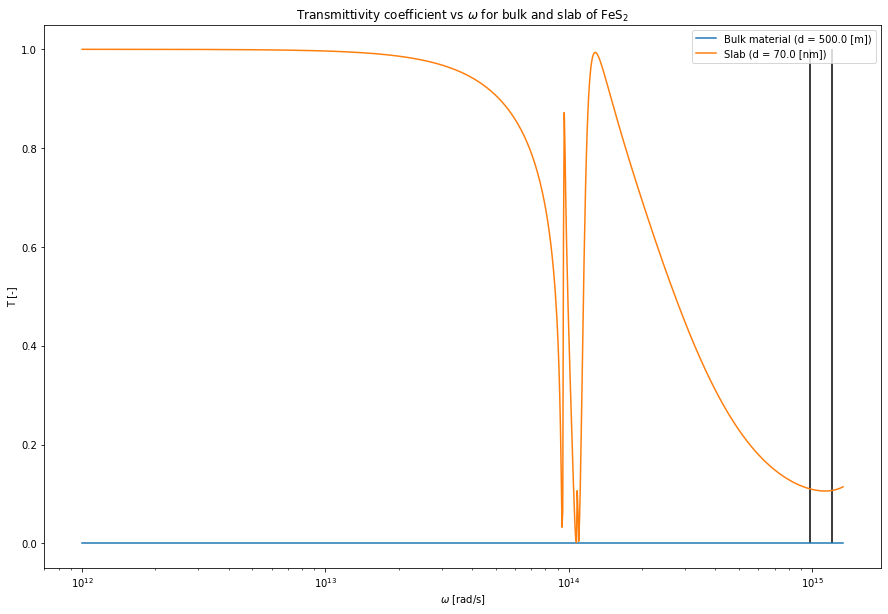

In [14]:
omega = np.logspace(12,np.log10(omegaG),n)

#angle d'incidence [°]
phi0 = 0

T1 = computeT(d1,omega,phi0)
T2 = computeT(d2,omega,phi0)

plt.figure(figsize=(15,10))
plt.plot(omega,T1,label='Bulk material (d = {} [m])'.format(d1/1e6))
plt.plot(omega,T2,label='Slab (d = {} [nm])'.format(d2*1000))
plt.title(r'Transmittivity coefficient vs $\omega$ for bulk and slab of FeS$_2$')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('T [-]')
plt.legend()
plt.xscale('log')
#the range of LASER frequencies
plt.vlines(9.832e14,0,1)
# = 90% of the bandgap
plt.vlines(omegaG*0.9,0,1)
plt.show()

## Absorbance of bulk material

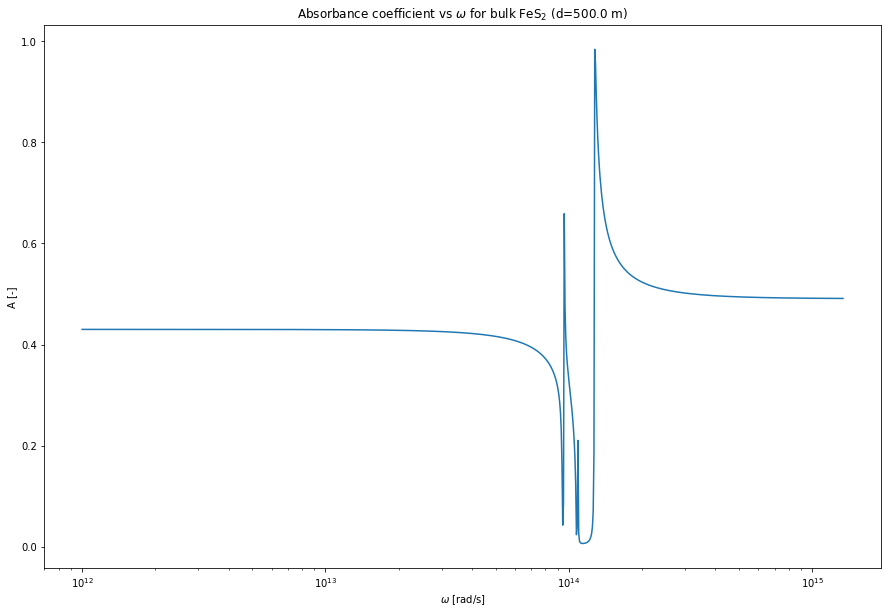

Highest peak : 0.993330400235892 at 113798831928346.22 [rad/s]


In [15]:
#angle d'incidence [°]
phi0 = 0

#film thickness [µm]
d = 0.05e10

A = 1-T-R

plt.figure(figsize=(15,10))
plt.plot(omega,A)
plt.title(r'Absorbance coefficient vs $\omega$ for bulk FeS$_2$ (d={} m)'.format(d/1e6))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('A [-]')
plt.xscale('log')
plt.show()
print("Highest peak : {0} at {1} [rad/s]".format(max(R),omega[np.argmax(R)]))

## Comparison with the slab

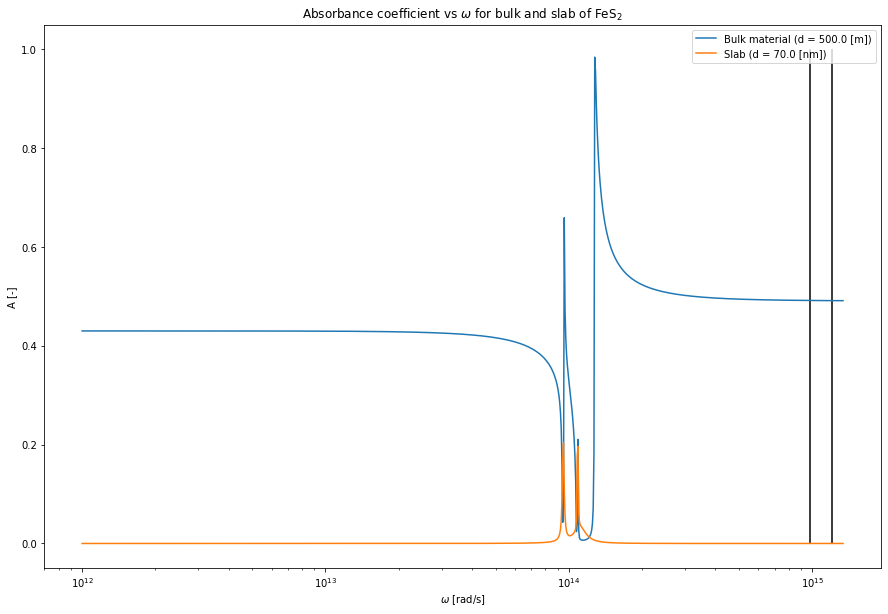

In [16]:
omega = np.logspace(12,np.log10(omegaG),n)

#angle d'incidence [°]
phi0 = 0

A1 = 1-T1-R1
A2 = 1-T2-R2

plt.figure(figsize=(15,10))
plt.plot(omega,A1,label='Bulk material (d = {} [m])'.format(d1/1e6))
plt.plot(omega,A2,label='Slab (d = {} [nm])'.format(d2*1000))
plt.title(r'Absorbance coefficient vs $\omega$ for bulk and slab of FeS$_2$')
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel('A [-]')
plt.legend()
plt.xscale('log')
#the range of LASER frequencies
plt.vlines(9.832e14,0,1)
# = 90% of the bandgap
plt.vlines(omegaG*0.9,0,1)
plt.show()

We can see that the absorbance is much higher for the bulk material than for the slab, which is consistent with the previous observations.

## Acceleration distance $D$

Computed as follows : 

$$D(v_\text{f})\sim \left(\dfrac{c}{2IA}\right)\displaystyle\int\limits_0^{v_\text{f}}\dfrac{m_T}{R(v)}\dfrac{\gamma(v)v}{\left(1-\dfrac{v}{c}\right)^2}\text{d}v$$

with 
- $v_f = \dfrac{c}{5}$ the final velocity reached by the spacecraft, 

- $c = 3\times 10^{8}$ [m/s] the speed of light in vacuum, 

- $I = 10$ [GW/m$^2$] the incident intensity, 

- $A=10$ [m$^2$] the surface of one side of the sail, 

- $m_T = m_\text{sail} + m_\text{payload} = m_\text{sail} + 10^{-4}$ [kg], 

- $R(v)$ the instantaneous reflectance of the sail for the Doppler shifted incident light and 

- $\gamma(v) = \dfrac{1}{\sqrt{1-\dfrac{v^2}{c^2}}}$ the Lorentz factor.

In [17]:
#data
c = 3e8 #[m/s]
I = 10e9 #[W/m²]
A = 10 #[m²]
v_f = c/5 #[m/s]
n = 2000 
v,step = np.linspace(0,v_f,n,retstep=True)
gamma = 1/(1-(v**2/c**2))**(1/2) #[rad/s]
m_payload = 1e-4 #[kg]
d = 0.07 #[m^{-6}]
phi0 = 0 #[°]
omega_g = 1.338e15 #[rad/s]
omega_s = 0.9*omega_g #[rad/s]
density = 4.89e3 #kg/m^3
m_sail = A*(d*1e-6)*density #[kg]
m_t = m_sail + m_payload #[kg]

#compute omega(v)
beta = v/c
omega = omega_s*np.sqrt((1-beta)/(1+beta))
#compute R(v)
R = computeR(d,omega,phi0)
#compute the integral by the method of trapezoids
integrant = m_t*gamma*v/(R*(1-v/c)**2)

#compute D_vf
D_vf = c/(2*I*A)*np.trapz(integrant,dx=step)

print("Acceleration distance : {} x 10^9 [m] for d = {} [nm]".format(D_vf/1e9,d*1000))

Acceleration distance : 14.472505345998348 x 10^9 [m] for d = 70.0 [nm]


The thickness of the sail enters in the computation of the reflectivity.

## Computation of $\langle R\rangle$ at normal incidence


$\langle R\rangle_{\omega_0-\omega_D} = \dfrac{1}{\omega_0-\omega_D}\int\limits_{\omega_D}^{\omega_0}R(\omega)\text{d}\omega$

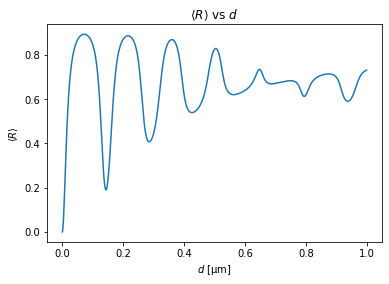

Optimal thickness : 72.07207207207207 [nm]
Corresponding acceleration distance : 14.460811211961781 x 10^9 [m]


In [21]:
#data
n = 1000
d = np.linspace(0,1,n) #[µm]
omega_g = 1.338e15 #[rad/s]
omega0 = 0.9*omega_g #[rad/s]
omegaD = omega0*np.sqrt((0.8)/(1.2))
omega,step = np.linspace(omegaD,omega0,n,retstep=True)
phi_0 = 0
Rmoy = np.zeros(n)
for i in range(n) :
    Rmoy[i] = 1/(omega0-omegaD)*np.trapz(computeR(d[i],omega,phi_0),omega) 
plt.plot(d,Rmoy)
plt.title(r'$\langle R\rangle$ vs $d$')
plt.ylabel(r'$\langle R\rangle$')
plt.xlabel(r'$d$ [µm]')
plt.show()
print("Optimal thickness : {0} [nm]".format(d[np.argmax(Rmoy)]*1000))
#compute R(v)
v,step = np.linspace(0,v_f,n,retstep=True)
gamma = 1/(1-(v**2/c**2))**(1/2) #[rad/s]
#compute omega(v)
beta = v/c
omega = omega_s*np.sqrt((1-beta)/(1+beta))
R = computeR(d[np.argmax(Rmoy)],omega,phi0)
#compute the integral by the method of trapezoids
integrant = m_t*gamma*v/(R*(1-v/c)**2)
#compute D_vf
D_vf = c/(2*I*A)*np.trapz(integrant,dx=step)
print("Corresponding acceleration distance : {0} x 10^9 [m]".format(D_vf/1e9))